# Metadata

```yaml
Course:    DS 5001 
Module:    08 Lab
Topic:     LDA Topic Similarity
Author:    R.C. Alvarado
Date:      09 March 2023
```

**Purpose:** To explore topc similarity in various vector spaces.

# Set Up

## Config

In [1]:
data_in = '../data/output'
data_out = '../data/output'
data_prefix = 'austen-melville'
local_lib = "../lib/"
colors = "YlGnBu"
n_topics = 40
OHCO = ['book_id','chap_num']

## Imports

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [4]:
import sys; sys.path.append(local_lib)
from hac import HAC

# Get the Data

In [5]:
# ls {data_in}/{data_prefix}-LDA*

In [6]:
DOCS = pd.read_csv(f"{data_in}/{data_prefix}-LDA_DOCS-chaps.csv").set_index(OHCO)
TOPICS = pd.read_csv(f"{data_in}/{data_prefix}-LDA_TOPICS-{n_topics}.csv").set_index('topic_id')
THETA = pd.read_csv(f"{data_in}/{data_prefix}-LDA_THETA-{n_topics}.csv").set_index(OHCO)
PHI = pd.read_csv(f"{data_in}/{data_prefix}-LDA_PHI-{n_topics}.csv").set_index('topic_id')

In [7]:
LIB = pd.read_csv(f'{data_in}/{data_prefix}-LIB_FIXED.csv').set_index('book_id')

Create a short label for each author for display purposes.

In [8]:
LIB['author_key'] = LIB.author.str.split(', ').str[0].str.lower()

# Clutser Topics

Use PHI and THETA as vector spaces to cluster topics.

In [9]:
labels  = [f"{a.upper()} {b}" for a, b in zip(TOPICS.author, TOPICS.label)]

In [10]:
labels[:5]

['MELVILLE T00 passengers, emigrants, steerage, cabin, mess, cook, organ, water, head',
 'MELVILLE T01 lord, man, men, things, wine, ha, day, way, ah',
 'MELVILLE T02 sea, air, fish, round, day, trees, groves, water, flowers',
 'MELVILLE T03 man, way, friend, nature, sort, stranger, confidence, kind, case',
 'MELVILLE T04 sir, herb, confidence, man, herb doctor, ugh, doctor, dont, boy']

## By PHI

<Figure size 640x480 with 0 Axes>

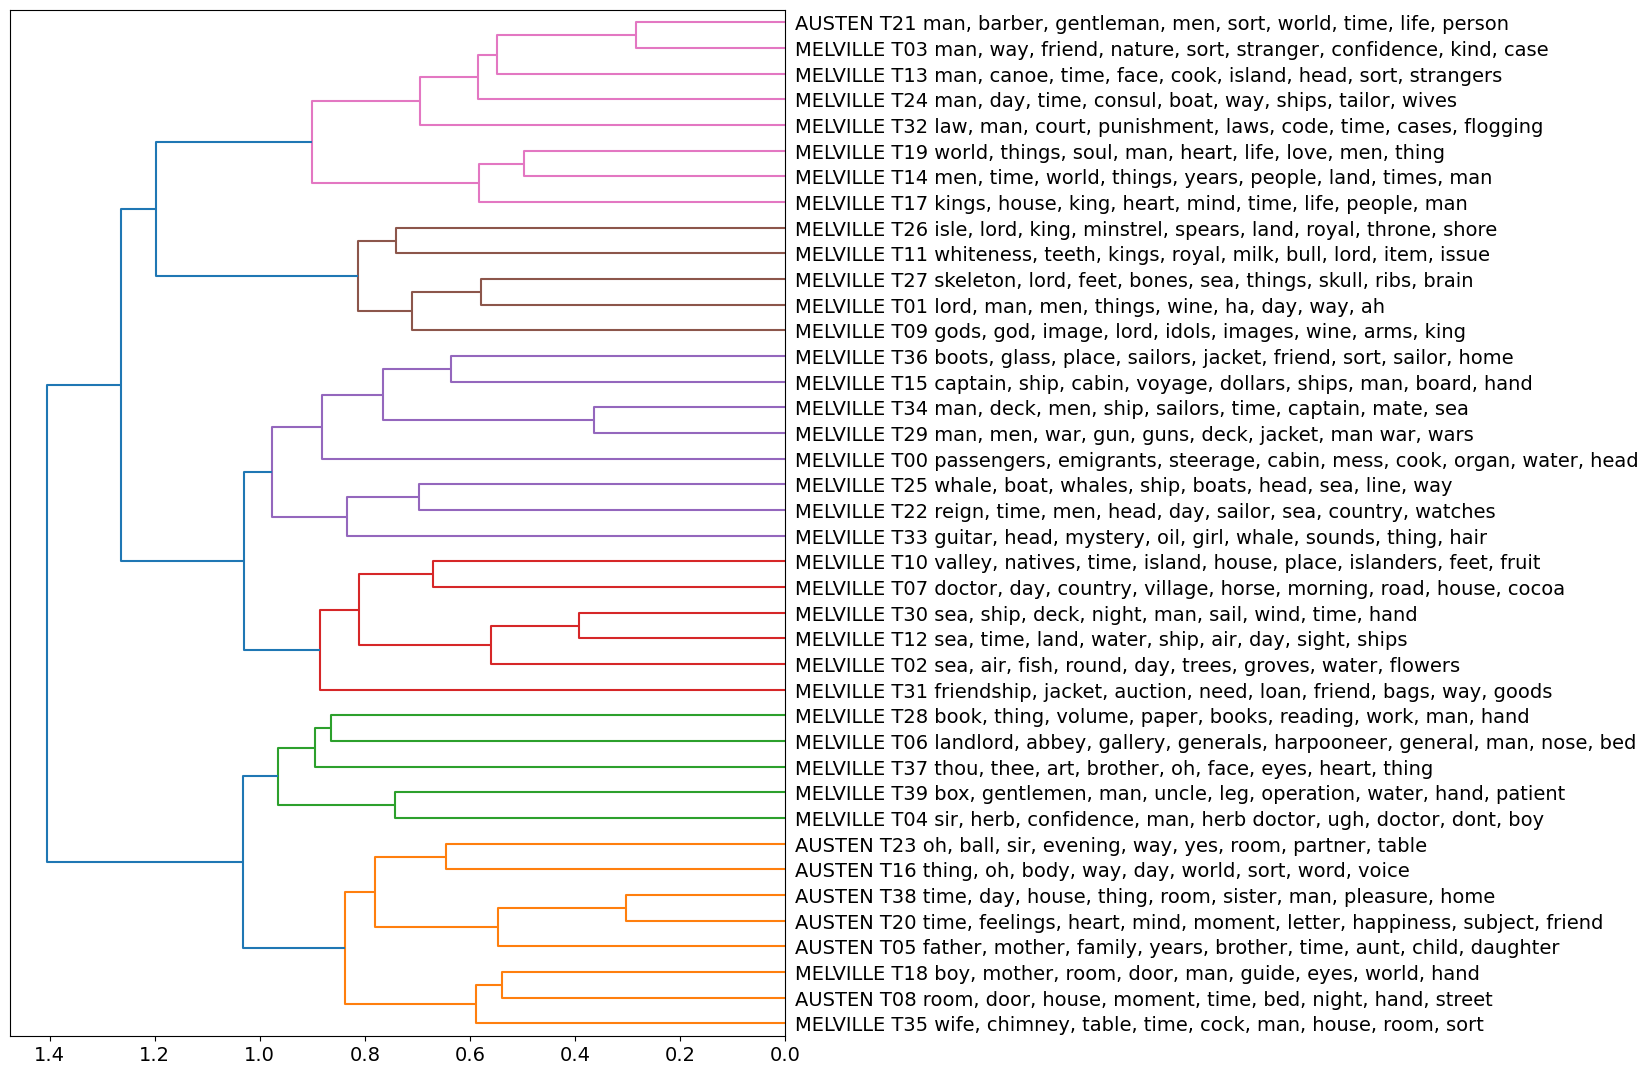

In [11]:
HAC(PHI, labels=labels).plot();

## By THETA

<Figure size 640x480 with 0 Axes>

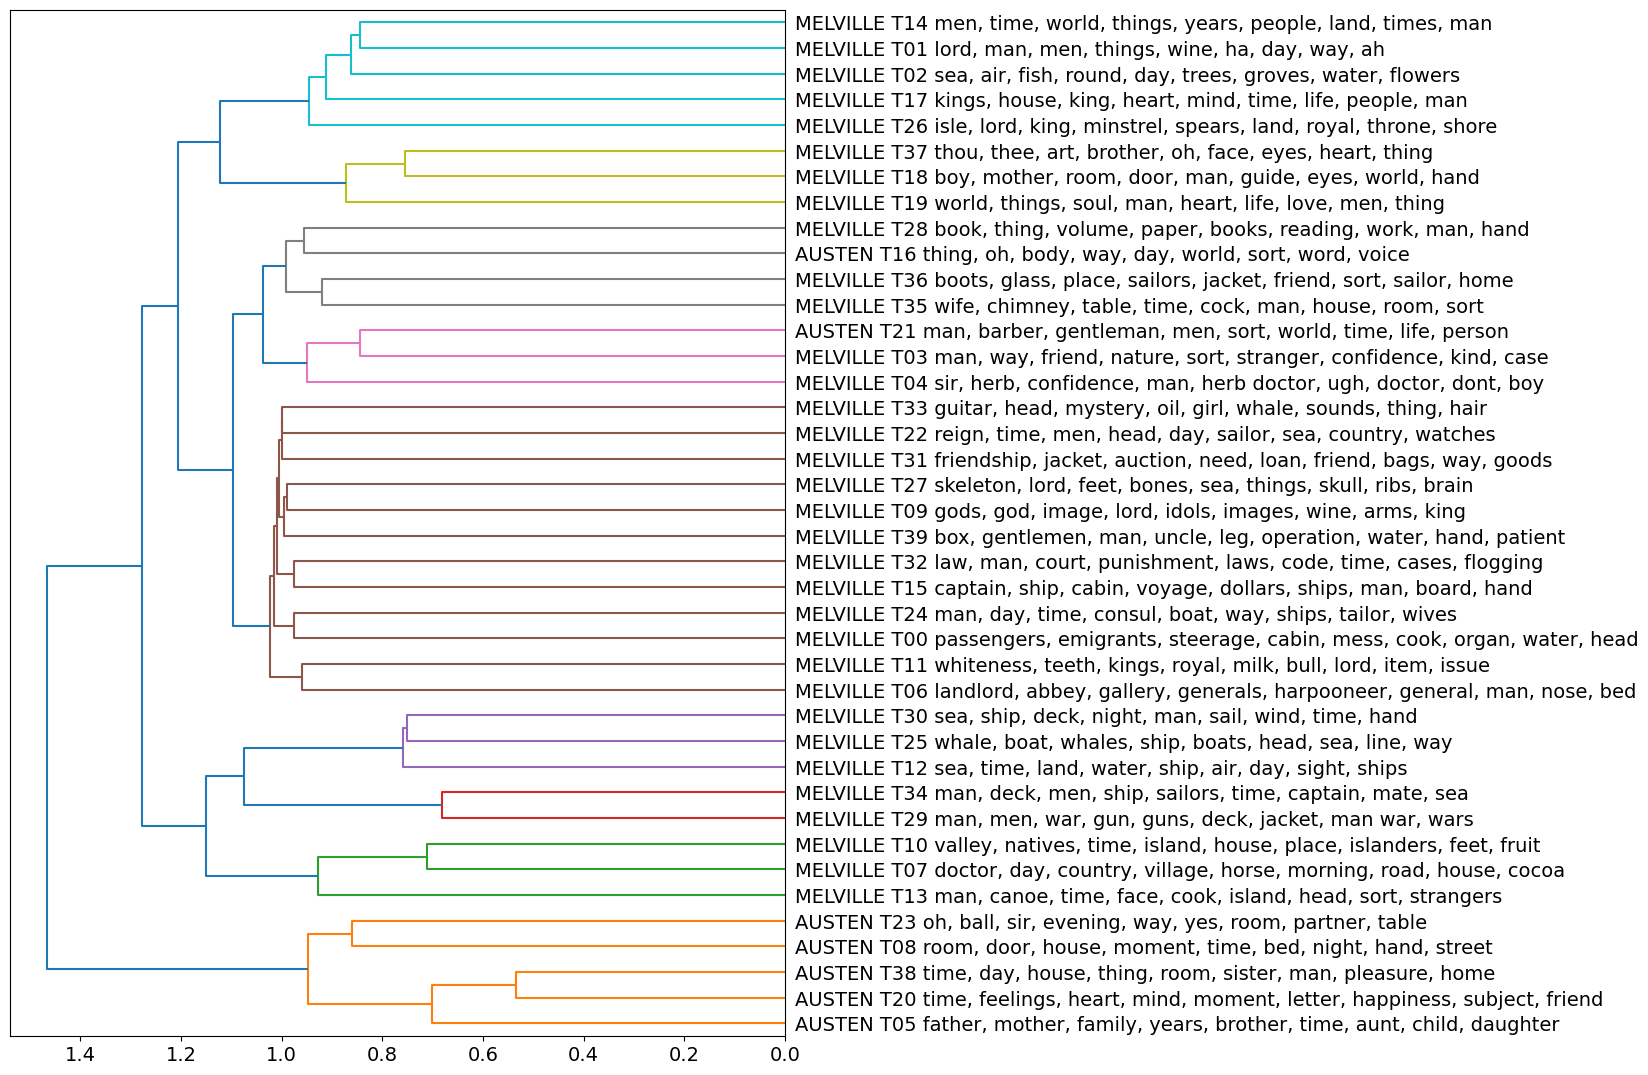

In [12]:
HAC(THETA.T, labels=labels).plot();

# PCA of Topics

## By PHI

In [26]:
pca_engine_phi = PCA(2)

In [27]:
PHI_COMPS = pd.DataFrame(pca_engine_phi.fit_transform(normalize(PHI, norm='l2', axis=1)), index=PHI.index)

<Figure size 640x480 with 0 Axes>

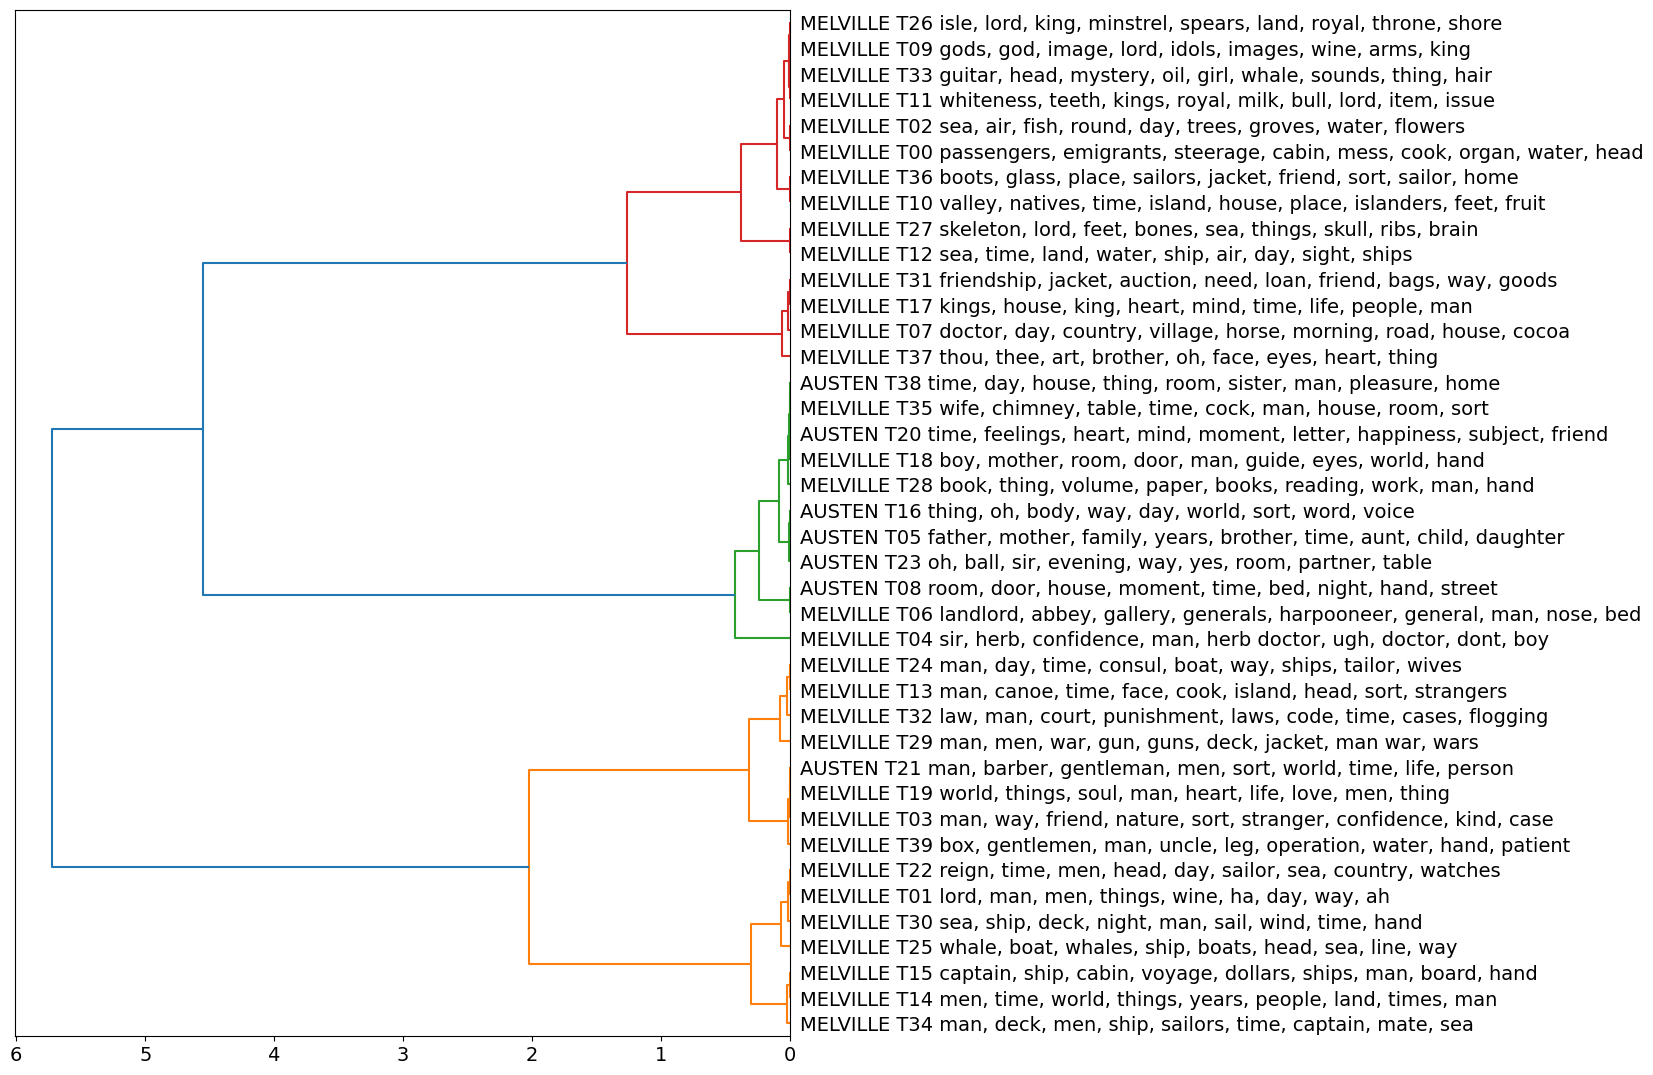

In [28]:
HAC(PHI_COMPS, labels=labels).plot()

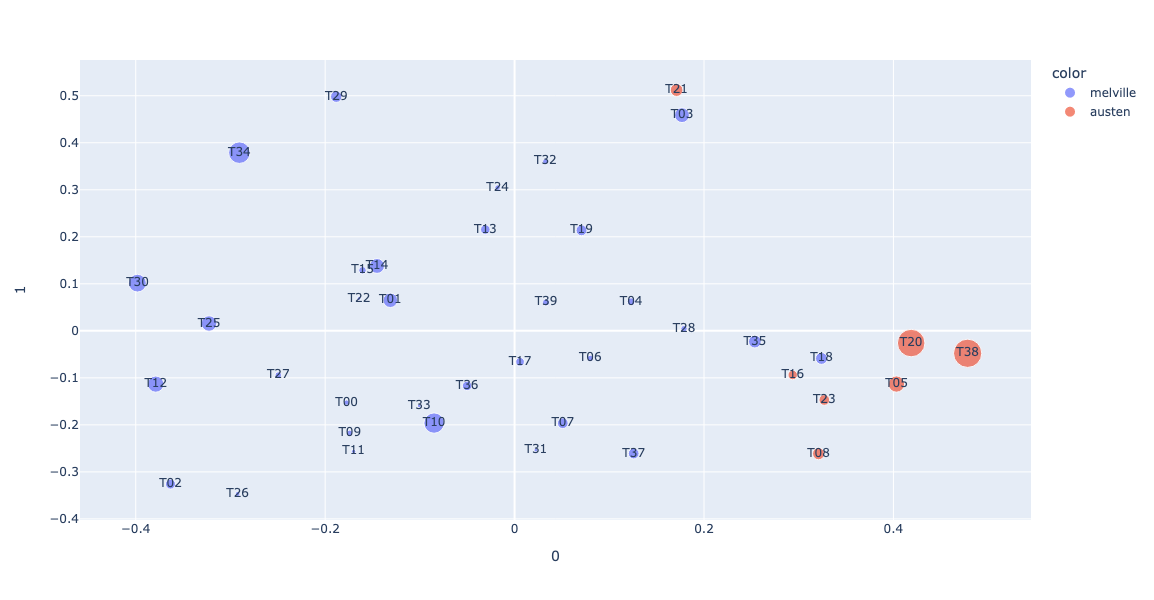

In [29]:
px.scatter(PHI_COMPS.reset_index(), 0, 1, 
           size=TOPICS.term_freq, 
           color=TOPICS.author, 
           text='topic_id', hover_name=TOPICS.label, height=600, width=700)

In [30]:
PHI_LOADINGS = pd.DataFrame(pca_engine_phi.components_.T * np.sqrt(pca_engine_phi.explained_variance_), index=PHI.T.index)
PHI_LOADINGS.index.name = 'term_str'

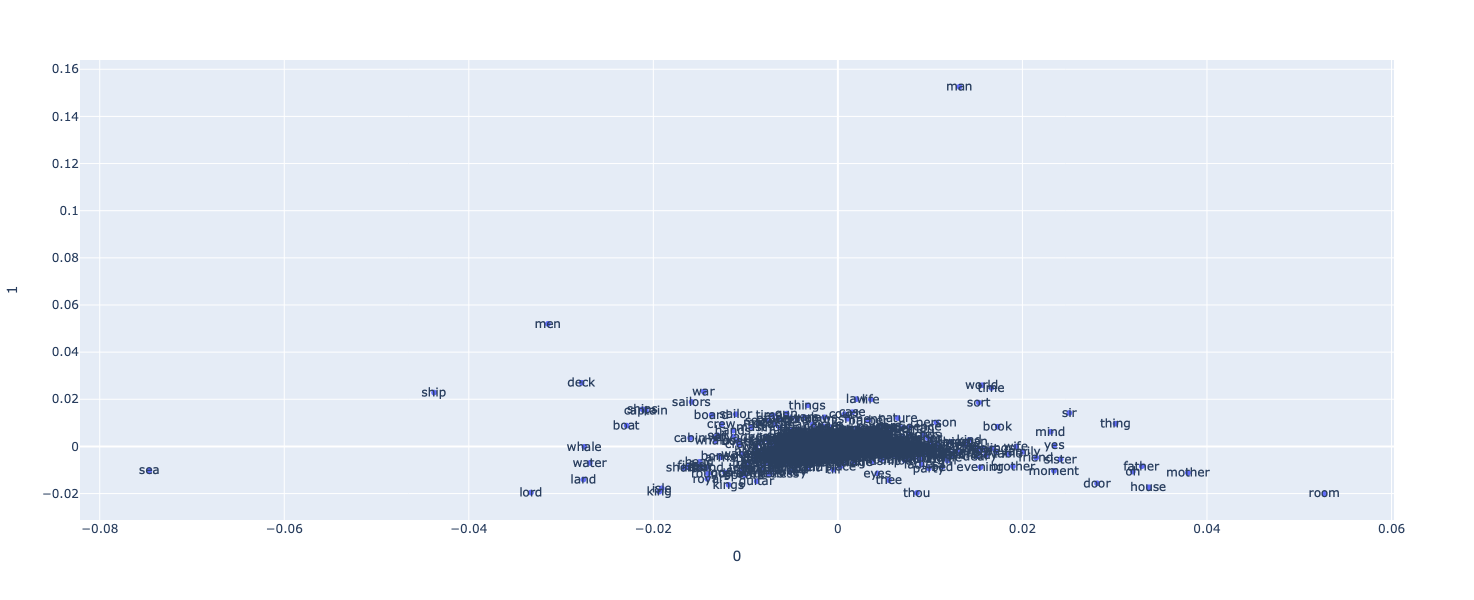

In [39]:
px.scatter(PHI_LOADINGS.reset_index(), 0, 1, text='term_str', height=600, width=700)

## By THETA

In [32]:
pca_engine_theta = PCA(5)

In [33]:
THETA_COMPS = pd.DataFrame(pca_engine_theta.fit_transform(normalize(THETA.T.values, norm='l2', axis=1)), index=THETA.T.index)
THETA_COMPS.index.name = 'topic_id'

<Figure size 640x480 with 0 Axes>

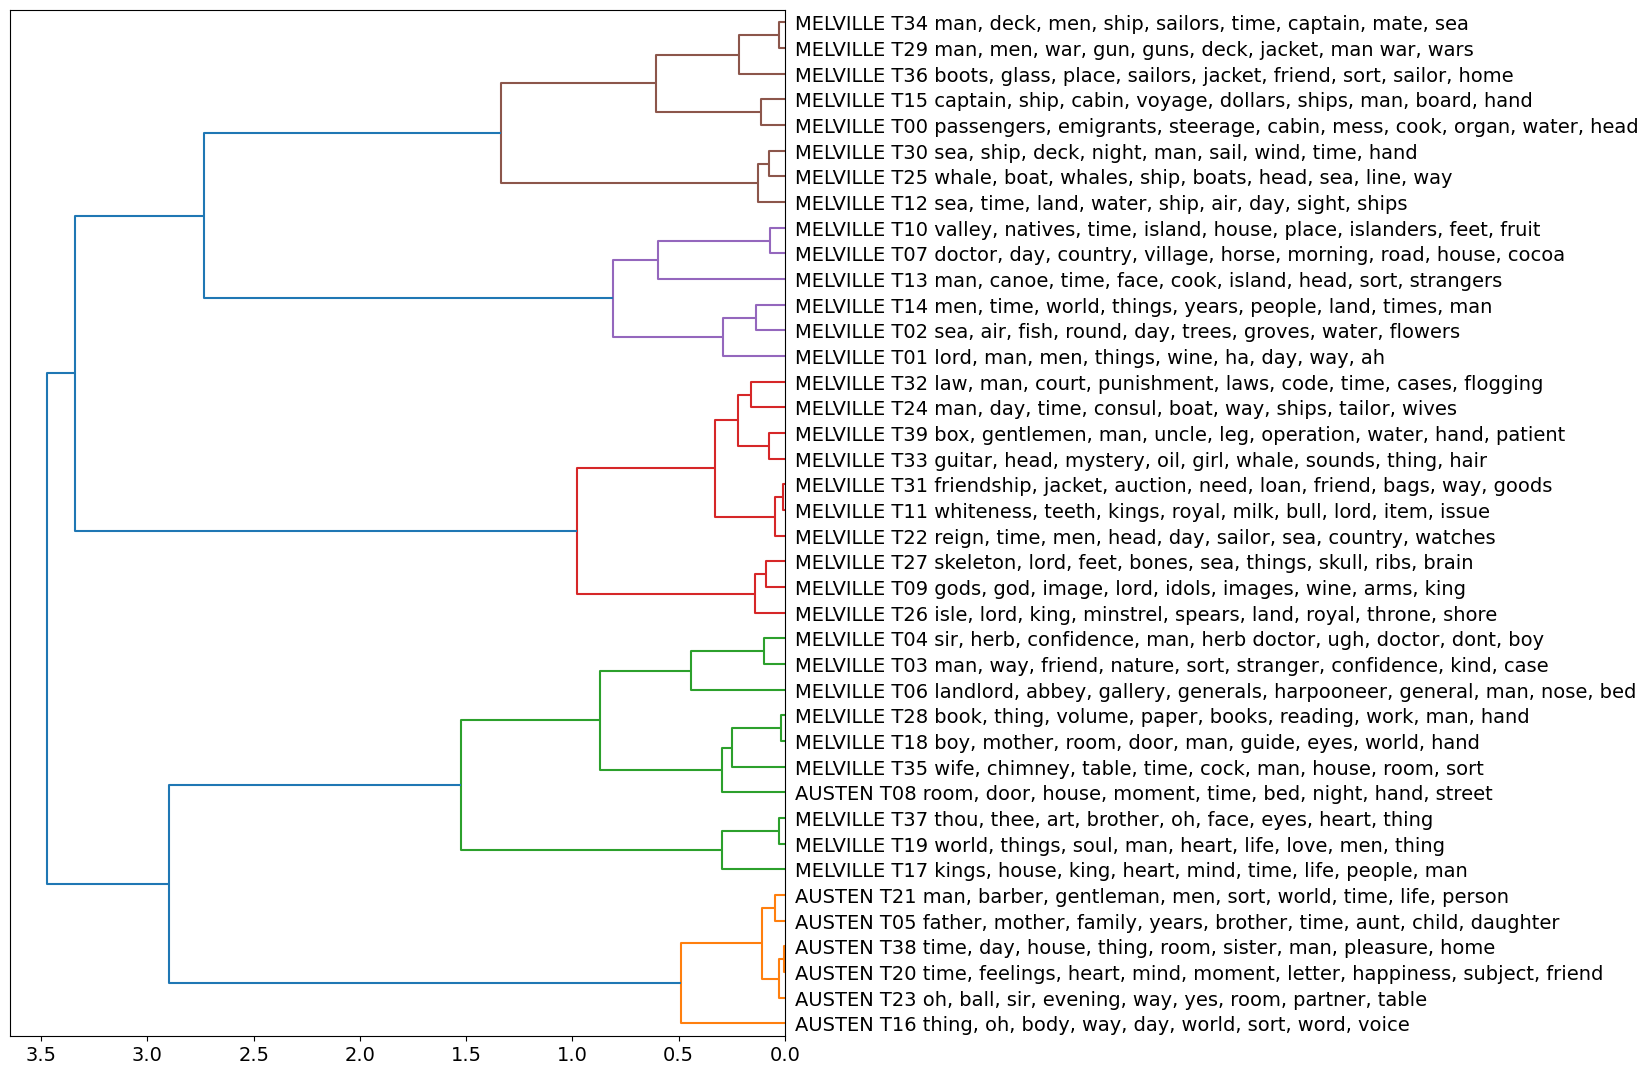

In [34]:
HAC(THETA_COMPS, labels=labels).plot()

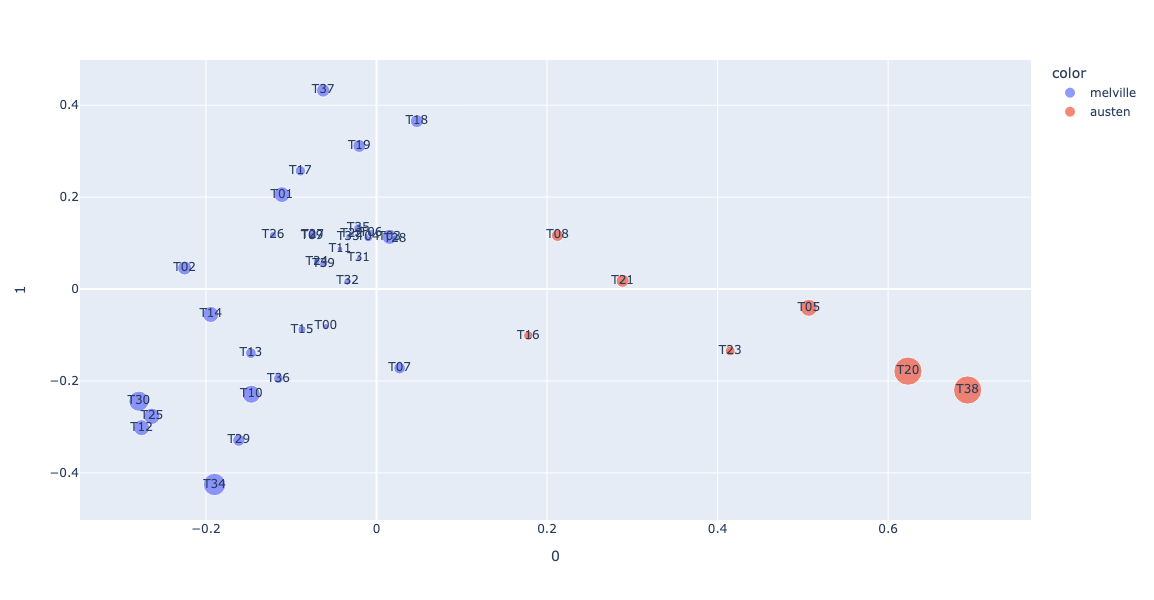

In [35]:
px.scatter(THETA_COMPS.reset_index(), 0, 1, 
           size=TOPICS.doc_weight_sum, 
           color=TOPICS.author, 
           text='topic_id', 
           hover_name=TOPICS.label, 
           height=600, width=700)

In [36]:
THETA_LOADINGS = pd.DataFrame(pca_engine_theta.components_.T * np.sqrt(pca_engine_theta.explained_variance_), index=THETA.index)

In [37]:
DOCS['doc_label'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].label}-{x.name[1]}", axis=1)
DOCS['book'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].label}", axis=1)
DOCS['n_chars'] = DOCS.doc_str.str.len()

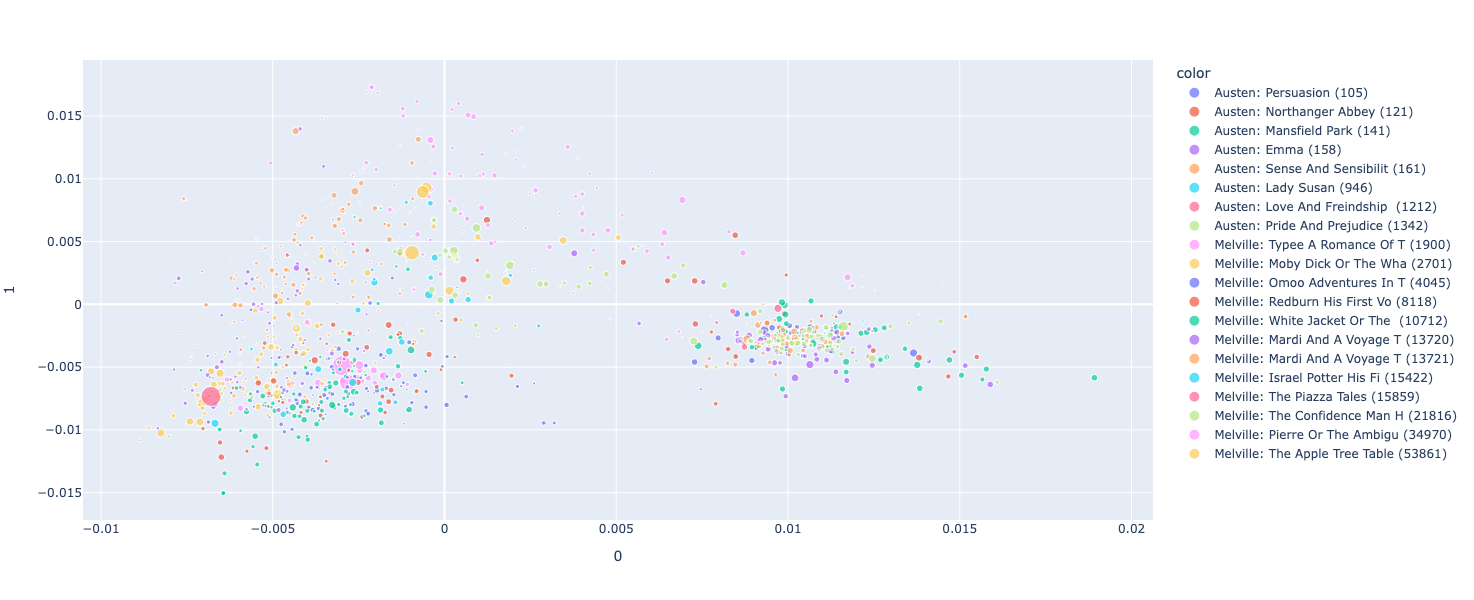

In [40]:
px.scatter(THETA_LOADINGS.reset_index(), 0, 1, 
           size=DOCS.n_chars,
           color=DOCS.book, height=600, width=900)